In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Loading the data

In [4]:
data=pd.read_csv("Parkinson.csv")

Dataset Details

In [5]:
data.columns

Index(['ID', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE', 'status'],
      dtype='object')

In [6]:
# using .shape we get to know about the number of rows and columns present in the dataset
data.shape

(480, 21)

In [7]:
# displaying the first rows from the dataset
data.head()

,ID,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,173,5.6431,28.199,34.398,0.00074,0.000005,0.00015,0.00038,0.00045,0.04229,...,0.02345,0.02756,0.02970,0.07035,0.003743,25.448,0.264110,0.750600,0.826650,0
1,325,12.6660,28.447,34.894,0.00564,0.000030,0.00331,0.00292,0.00994,0.02751,...,0.01604,0.01657,0.01879,0.04812,0.018100,19.147,0.431674,0.683244,0.168895,0
2,19,19.6810,28.695,35.389,0.00823,0.000067,0.00392,0.00420,0.01176,0.02592,...,0.01269,0.01550,0.02127,0.03807,0.031999,20.454,0.654040,0.715000,0.336180,1
3,24,25.6470,28.905,35.810,0.00482,0.000055,0.00206,0.00284,0.00618,0.05712,...,0.03161,0.03681,0.04096,0.09483,0.043069,15.739,0.659260,0.727770,0.203540,1
4,24,33.6420,29.187,36.375,0.00520,0.000054,0.00276,0.00305,0.00828,0.05281,...,0.02690,0.03658,0.04736,0.08070,0.040279,15.697,0.588390,0.753080,0.234980,1


In [8]:
# Remove two columns name is 'C' and 'D'
#data=data.drop(['ID', 'test_time'], axis = 1)
data

,ID,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,173,5.6431,28.199,34.398,0.00074,0.000005,0.00015,0.00038,0.00045,0.04229,...,0.02345,0.02756,0.02970,0.07035,0.003743,25.448,0.264110,0.750600,0.826650,0
1,325,12.6660,28.447,34.894,0.00564,0.000030,0.00331,0.00292,0.00994,0.02751,...,0.01604,0.01657,0.01879,0.04812,0.018100,19.147,0.431674,0.683244,0.168895,0
2,19,19.6810,28.695,35.389,0.00823,0.000067,0.00392,0.00420,0.01176,0.02592,...,0.01269,0.01550,0.02127,0.03807,0.031999,20.454,0.654040,0.715000,0.336180,1
3,24,25.6470,28.905,35.810,0.00482,0.000055,0.00206,0.00284,0.00618,0.05712,...,0.03161,0.03681,0.04096,0.09483,0.043069,15.739,0.659260,0.727770,0.203540,1
4,24,33.6420,29.187,36.375,0.00520,0.000054,0.00276,0.00305,0.00828,0.05281,...,0.02690,0.03658,0.04736,0.08070,0.040279,15.697,0.588390,0.753080,0.234980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,308,114.7000,17.510,26.510,0.00520,0.000030,0.00287,0.00312,0.00862,0.06511,...,0.03671,0.04159,0.04683,0.11012,0.048240,13.922,0.602874,0.740837,0.220968,1
476,210,121.8000,17.670,26.670,0.00127,0.000010,0.00029,0.00057,0.00088,0.07266,...,0.03829,0.04440,0.06388,0.11488,0.016998,18.765,0.468310,0.702750,0.836520,1
477,21,128.7600,17.826,26.826,0.01344,0.000102,0.00684,0.00603,0.02053,0.10508,...,0.05993,0.05776,0.07356,0.17979,0.061957,16.265,0.567660,0.695040,0.289730,1
478,288,135.7300,17.983,26.983,0.00197,0.000016,0.00046,0.00101,0.00138,0.08563,...,0.04438,0.05057,0.07495,0.13313,0.023437,17.316,0.576600,0.704240,0.818080,0


In [9]:
data.describe() #statistical data about the dataset

,ID,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
count,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,122.443750,88.658524,23.567225,29.596485,0.004343,2.921177e-05,0.001992,0.002272,0.005975,0.043604,...,0.022623,0.026576,0.033754,0.067869,0.033435,21.401727,0.487672,0.668347,0.452446,0.500000
std,111.331911,50.414578,8.084036,10.686764,0.006596,3.696722e-05,0.003774,0.004209,0.011323,0.036941,...,0.019110,0.023276,0.025501,0.057330,0.071335,4.927692,0.129493,0.069413,0.306853,0.500522
min,1.000000,3.866000,10.737000,14.039000,0.000210,6.860000e-07,0.000020,0.000050,0.000050,0.006560,...,0.003350,0.004150,0.005220,0.010040,0.000618,2.206000,0.178730,0.526460,0.042752,0.000000
25%,25.000000,45.800750,14.736000,18.736000,0.001278,7.270000e-06,0.000215,0.000530,0.000640,0.020268,...,0.010703,0.012040,0.016428,0.032100,0.006596,19.158250,0.392400,0.615397,0.172480,0.000000
50%,76.000000,89.637500,26.798000,31.330000,0.002920,1.885000e-05,0.001325,0.001510,0.003980,0.030745,...,0.015695,0.018455,0.025900,0.047090,0.014325,22.050500,0.487445,0.660290,0.321165,0.500000
75%,232.000000,131.650000,29.188000,38.353000,0.005175,3.785000e-05,0.002443,0.002630,0.007317,0.051820,...,0.027173,0.031808,0.040802,0.081510,0.029067,24.670750,0.585133,0.725522,0.809773,1.000000
max,325.000000,178.800000,36.978000,47.970000,0.085890,3.638300e-04,0.049610,0.057240,0.148830,0.226910,...,0.117160,0.138330,0.146410,0.351470,0.725370,33.867000,0.947920,0.859200,0.907660,1.000000


In [10]:
# displaying the dataset of the columns in the dataset
data.dtypes

ID                 int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
status             int64
dtype: object

In [11]:
data['status'] = data['status'].astype('object')

EDA (Exploratory data analysis)

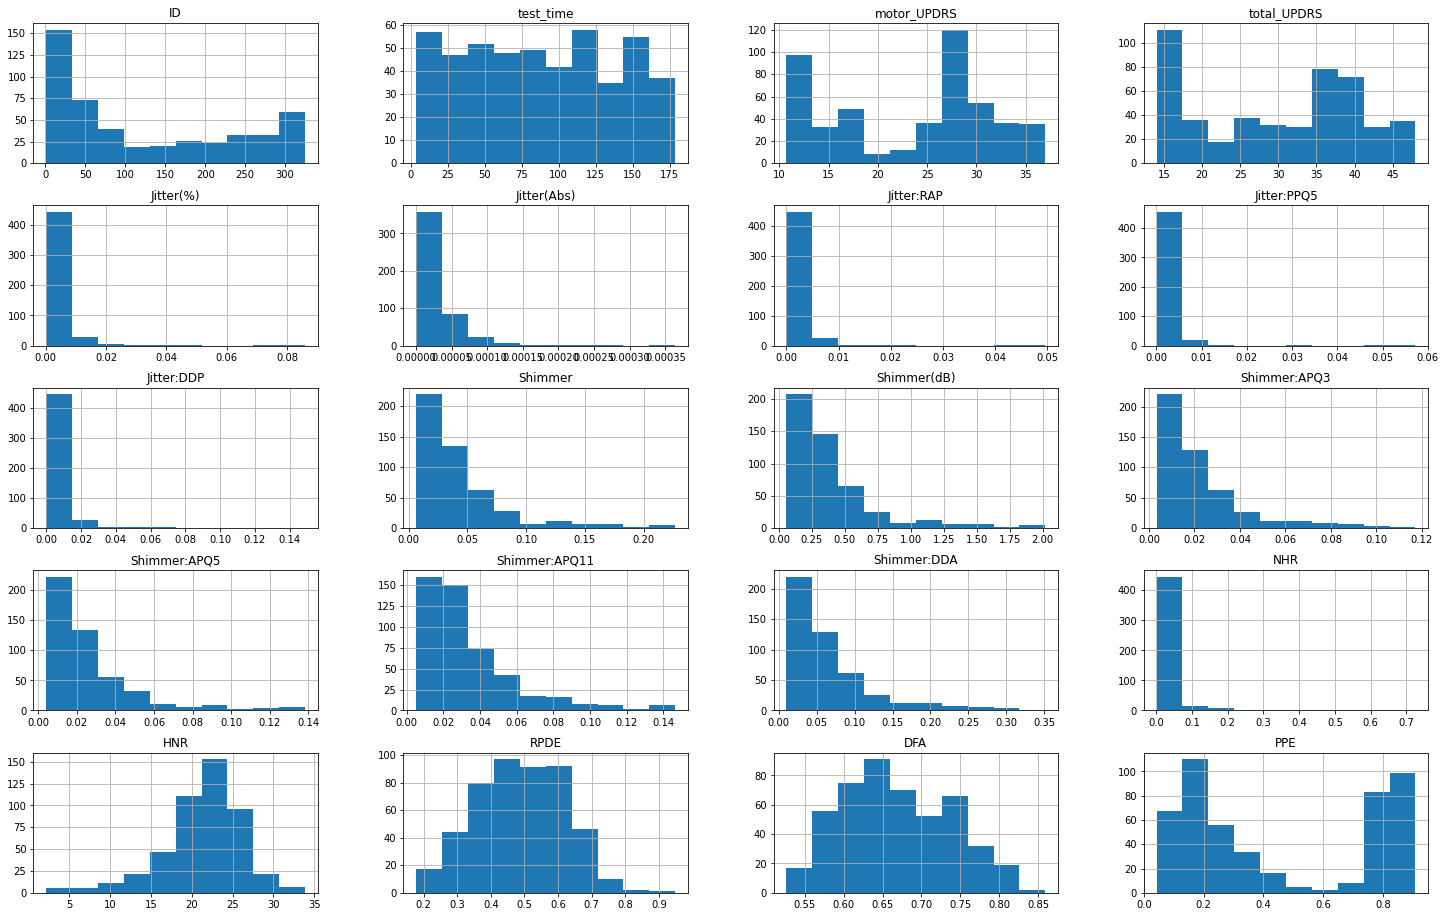

In [12]:
# Plotting the histogram of dataset
data.hist(figsize=(25,16))
plt.show()

In [13]:
list_of_non_object_cols = data.loc[:, data.dtypes != 'object'].columns.tolist()

Functions to ease up plotting of various continous variables

In [14]:
def Distribution_Continous_Variables(series,color,title):
    plt.figure(figsize=(10, 5))
    sns.distplot(series, color = color).set_title(title)
def BoxPlot(**kwargs):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = kwargs['x'], \
                y = kwargs['y'], \
                data = kwargs['data'], \
                color = kwargs['color'], \
                hue = kwargs['hue']).set_title(kwargs['title'])    

Univariate Analysis

Plots to analyse impact of continous on the status

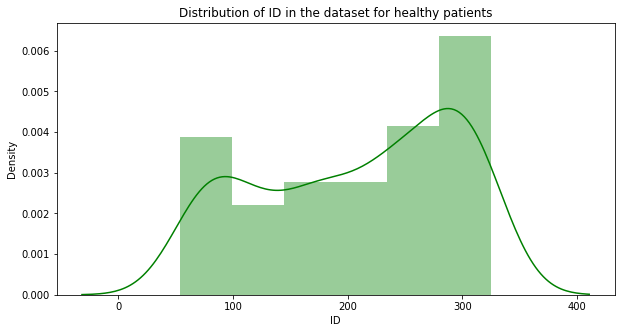

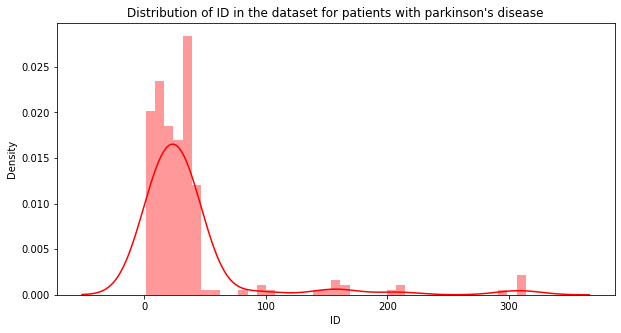

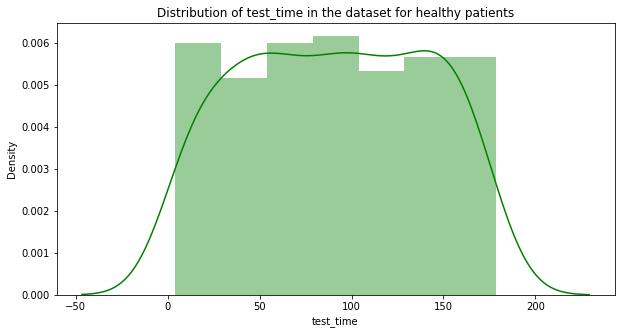

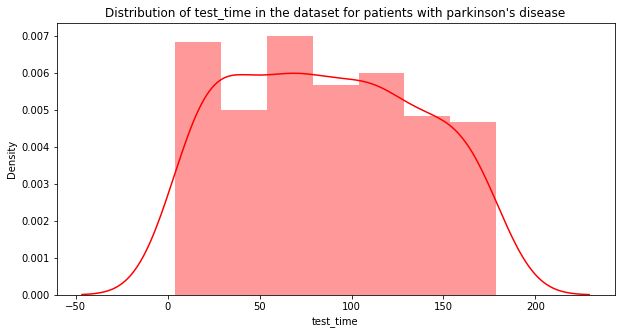

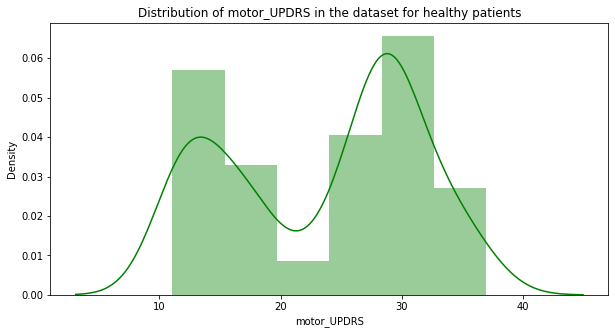

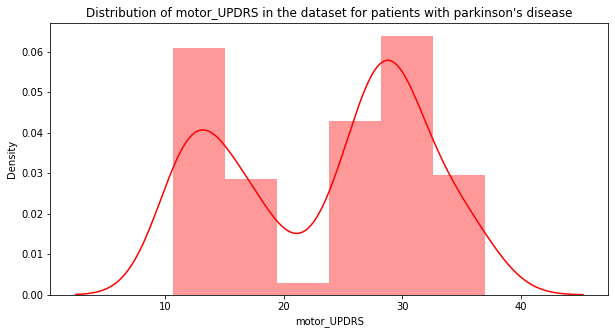

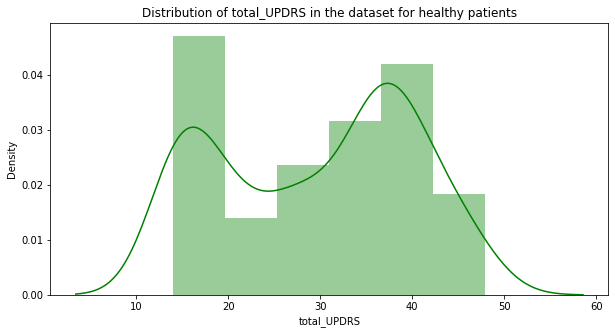

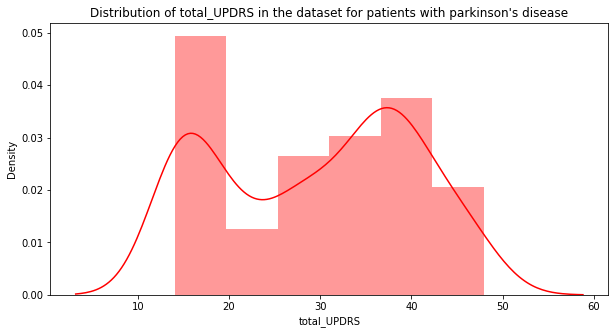

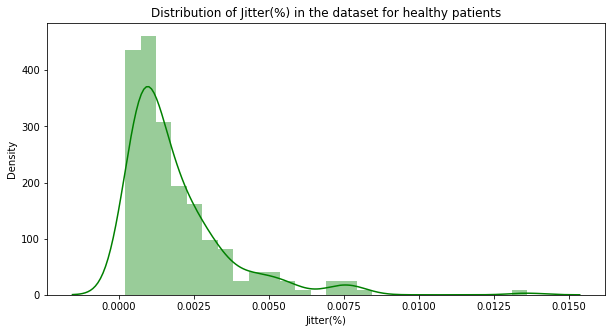

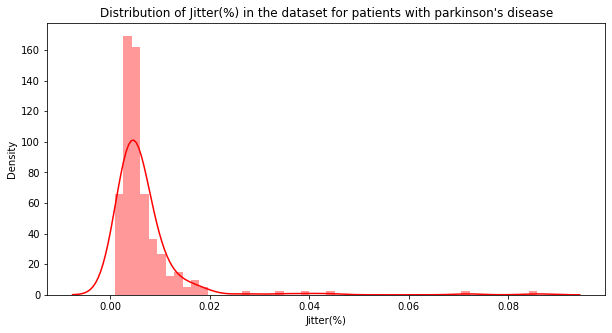

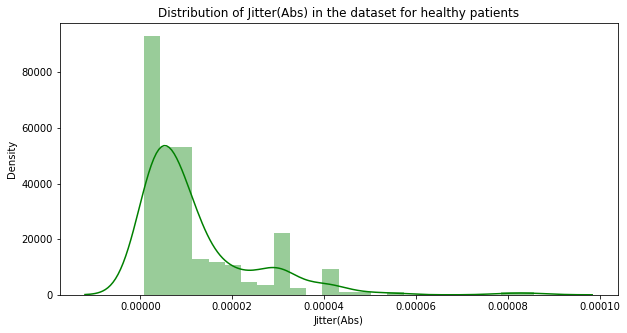

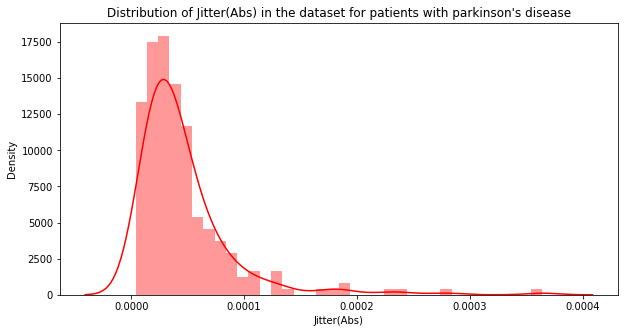

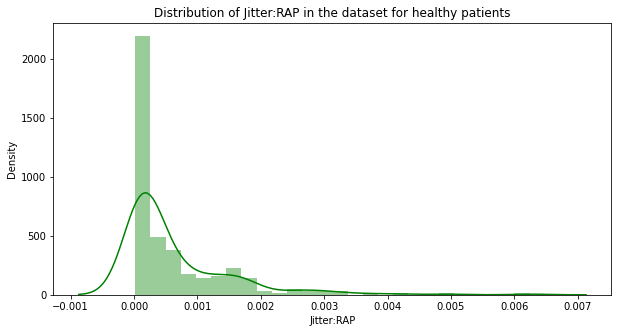

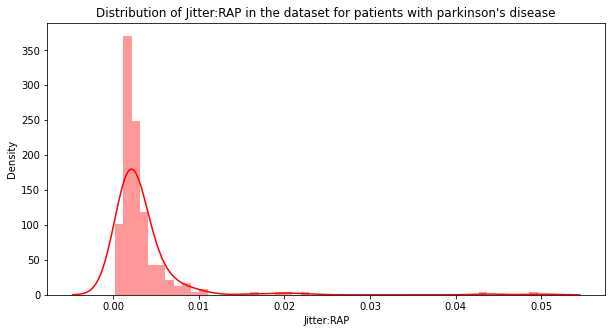

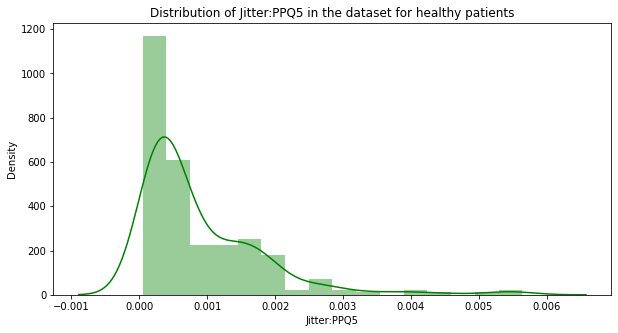

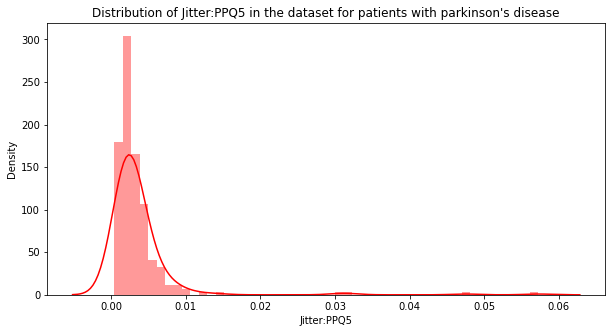

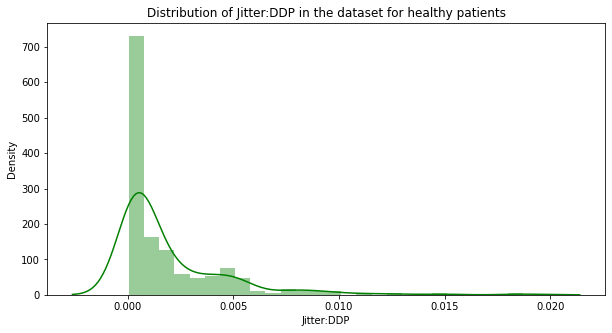

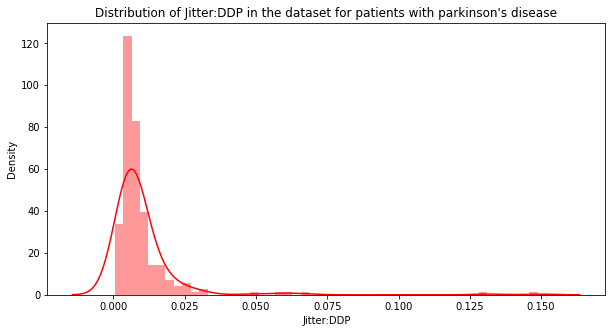

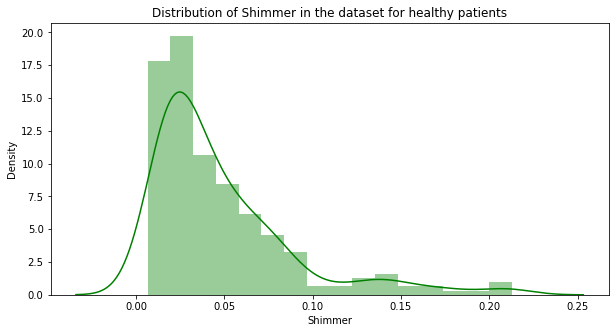

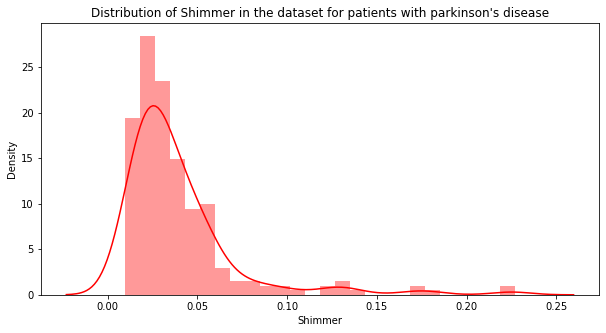

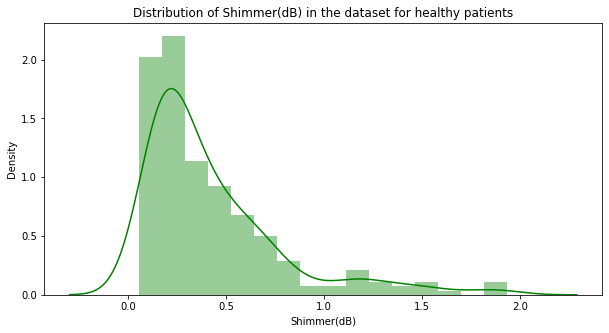

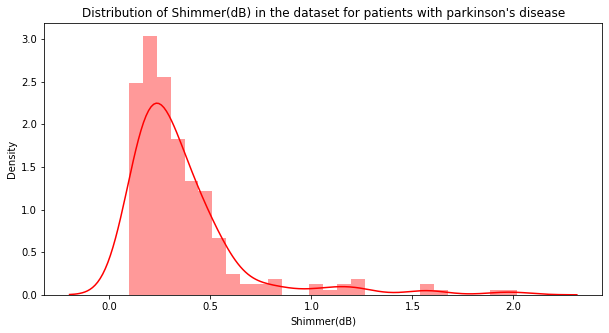

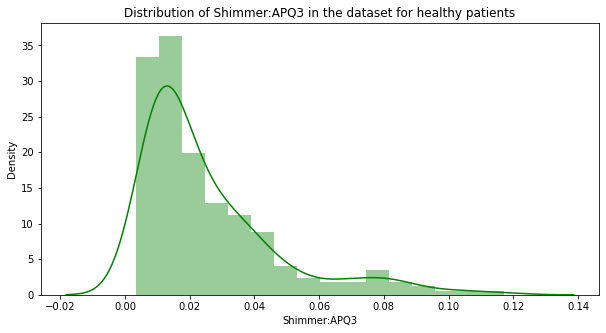

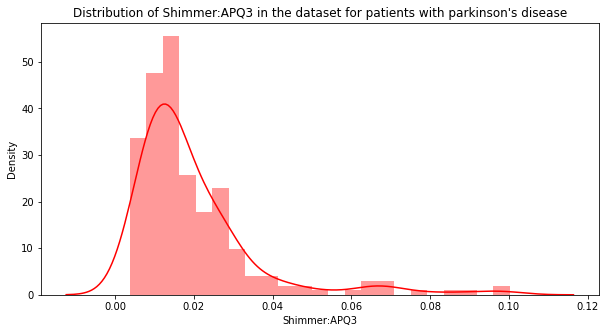

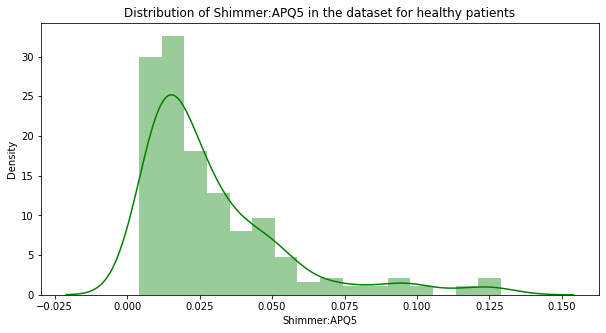

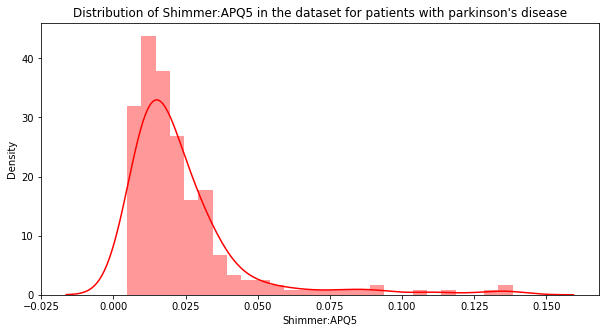

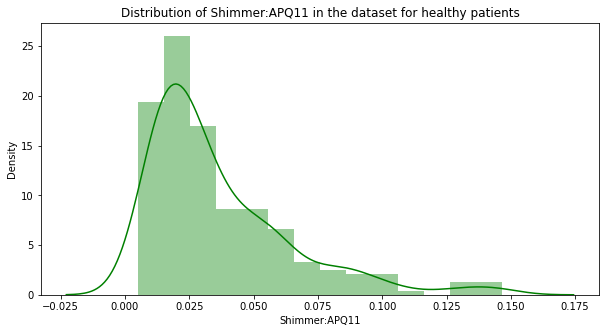

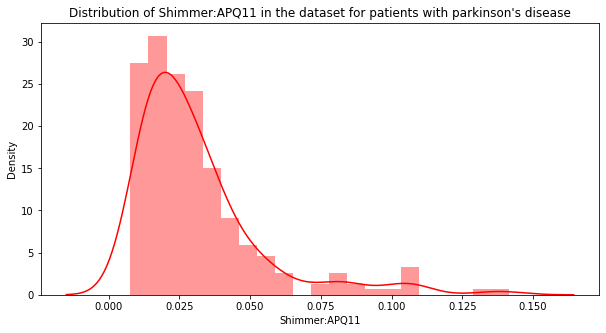

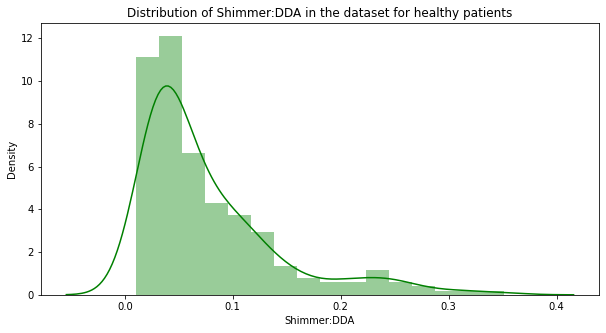

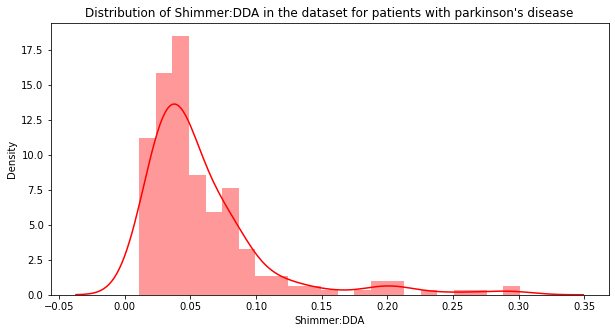

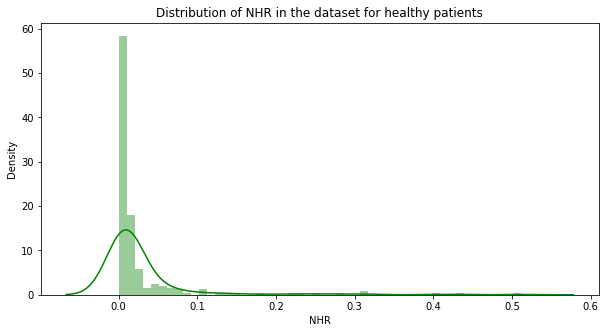

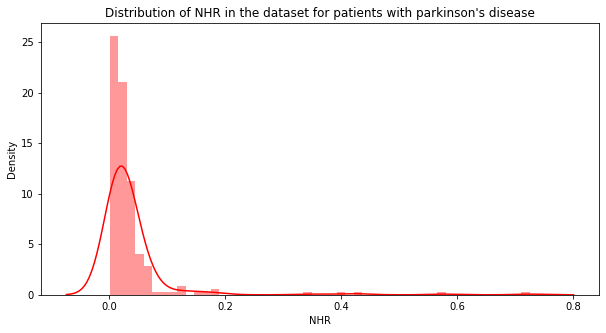

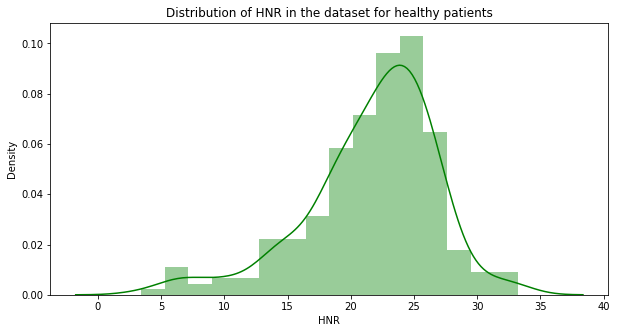

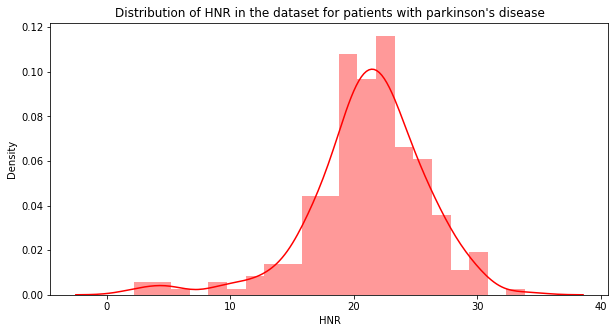

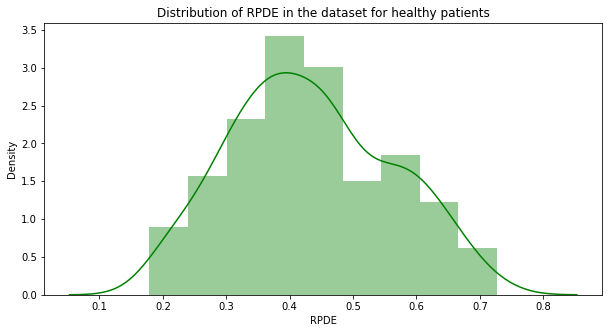

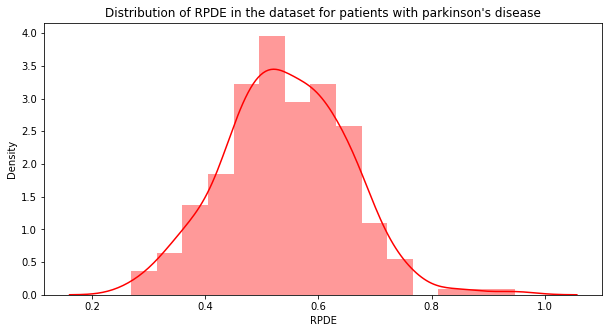

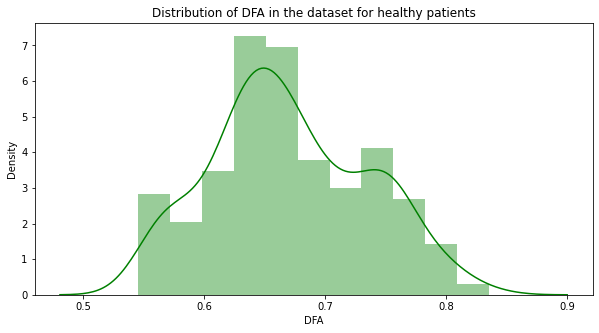

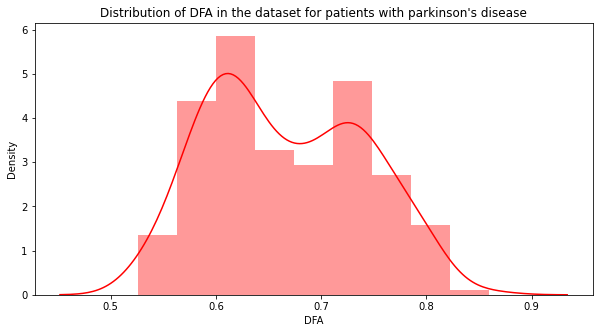

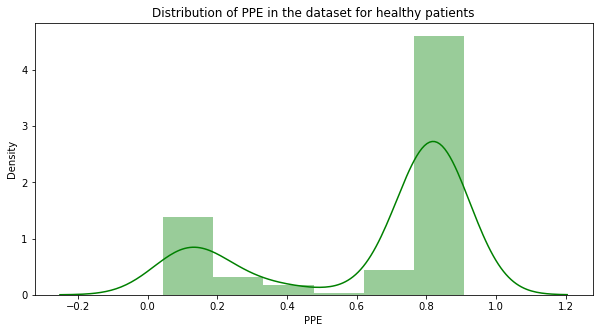

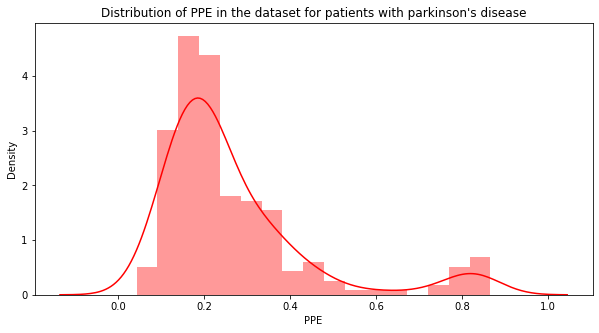

In [15]:
for col in list_of_non_object_cols:
    Distribution_Continous_Variables(data[data['status']==0][col],"green","Distribution of {} in the dataset for healthy patients"\
                                    .format(col))
    Distribution_Continous_Variables(data[data['status']==1][col],"red","Distribution of {} in the dataset for patients with parkinson's disease"\
                                    .format(col))

Data Correlation

In [16]:
data.corr()

,ID,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
ID,1.000000,0.027433,0.007328,0.007857,-0.276397,-0.370162,-0.261520,-0.237475,-0.261447,0.098246,0.089904,0.112670,0.105257,0.092675,0.112671,-0.046222,0.005650,-0.282354,0.146883,0.329155
test_time,0.027433,1.000000,0.267425,0.325700,-0.071362,-0.051212,-0.065358,-0.079533,-0.065288,-0.042936,-0.044395,-0.037993,-0.044046,-0.050453,-0.037988,-0.077118,0.023030,-0.039057,0.025484,-0.048417
motor_UPDRS,0.007328,0.267425,1.000000,0.981899,-0.024248,-0.011325,-0.022821,-0.028759,-0.022795,-0.033897,-0.031365,-0.037803,-0.026534,-0.030675,-0.037806,-0.058519,0.059368,-0.035765,0.028826,-0.046570
total_UPDRS,0.007857,0.325700,0.981899,1.000000,-0.032767,-0.019040,-0.032204,-0.035878,-0.032169,-0.035816,-0.034141,-0.039282,-0.026916,-0.033064,-0.039285,-0.059173,0.053180,-0.029414,0.014214,-0.058630
Jitter(%),-0.276397,-0.071362,-0.024248,-0.032767,1.000000,0.865378,0.992733,0.977837,0.992735,0.285681,0.299697,0.226100,0.279573,0.232912,0.226110,0.617096,-0.421808,0.483331,0.171683,-0.188605
Jitter(Abs),-0.370162,-0.051212,-0.011325,-0.019040,0.865378,1.000000,0.847827,0.796201,0.847836,0.204168,0.217104,0.163765,0.190562,0.177542,0.163770,0.507449,-0.407756,0.570568,0.233943,-0.261545
Jitter:RAP,-0.261520,-0.065358,-0.022821,-0.032204,0.992733,0.847827,1.000000,0.973900,1.000000,0.256524,0.269939,0.200847,0.253179,0.198247,0.200856,0.594699,-0.383586,0.444109,0.159318,-0.196610
Jitter:PPQ5,-0.237475,-0.079533,-0.028759,-0.035878,0.977837,0.796201,0.973900,1.000000,0.973897,0.311381,0.322134,0.248088,0.313274,0.256157,0.248094,0.644720,-0.420066,0.442498,0.145281,-0.156291
Jitter:DDP,-0.261447,-0.065288,-0.022795,-0.032169,0.992735,0.847836,1.000000,0.973897,1.000000,0.256541,0.269959,0.200856,0.253199,0.198278,0.200865,0.594696,-0.383601,0.444072,0.159286,-0.196567
Shimmer,0.098246,-0.042936,-0.033897,-0.035816,0.285681,0.204168,0.256524,0.311381,0.256541,1.000000,0.997103,0.985611,0.983832,0.943277,0.985611,0.697815,-0.783031,0.352879,0.150621,0.329902


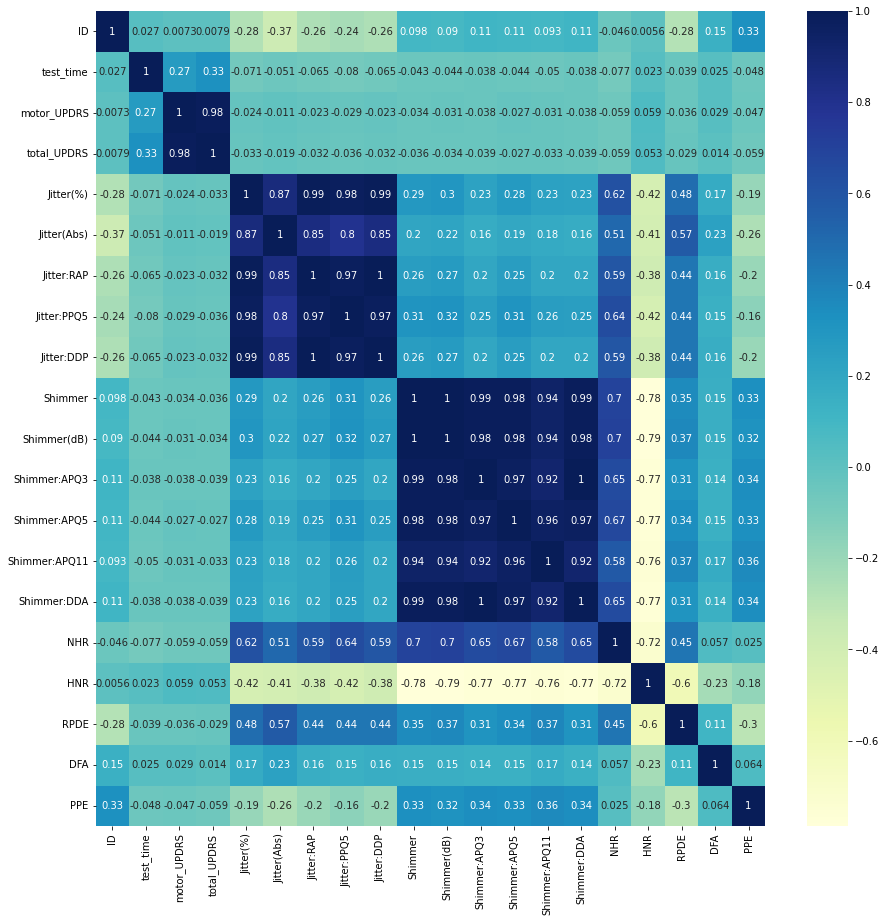

In [17]:
plt.figure(figsize=(15, 15))
p = sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')

Box Plot

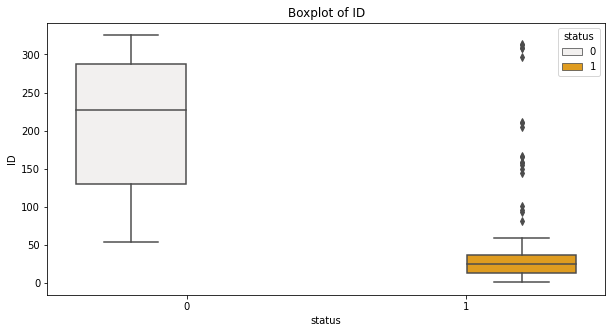

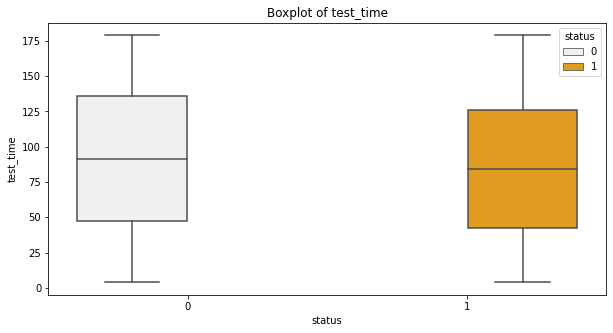

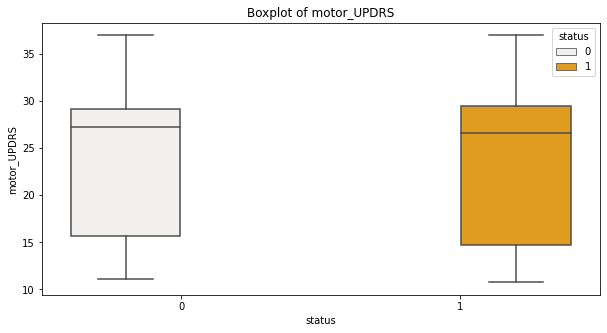

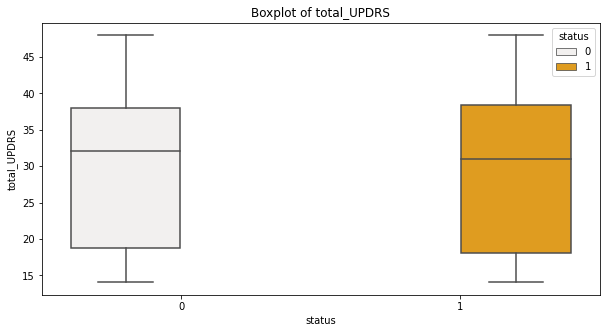

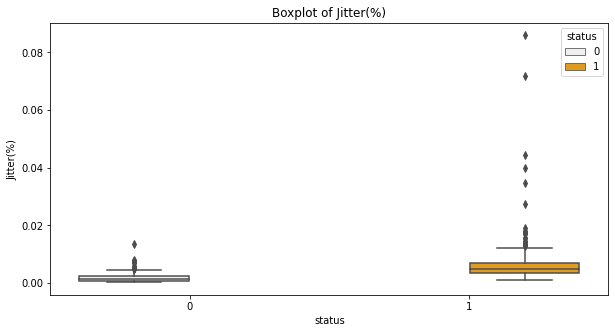

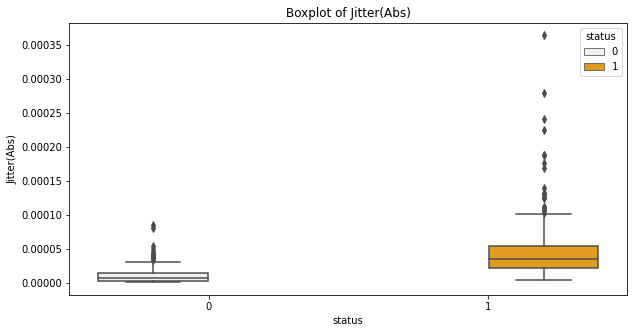

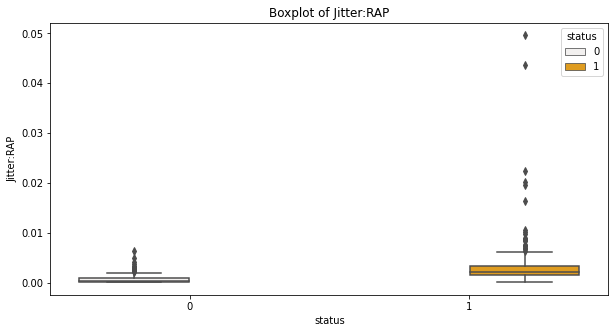

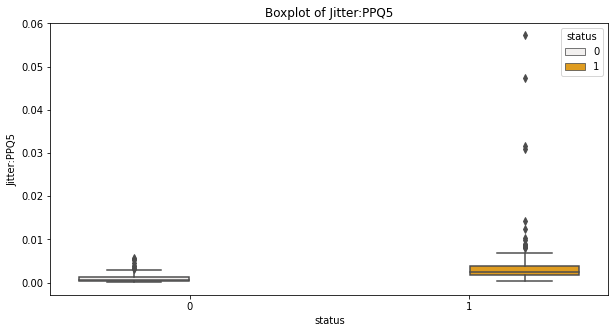

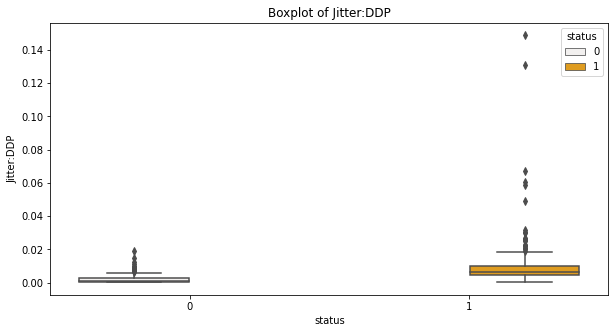

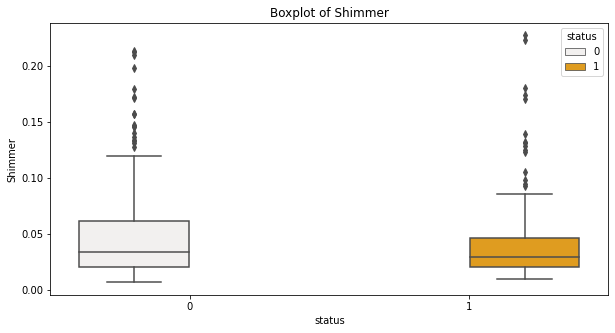

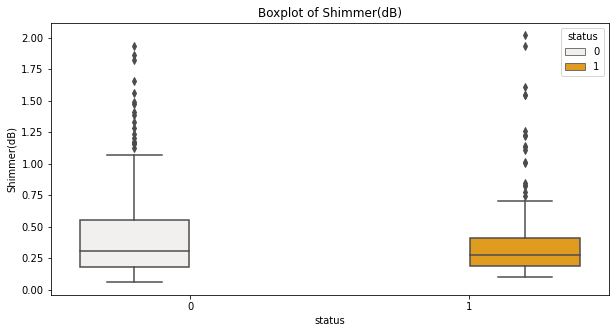

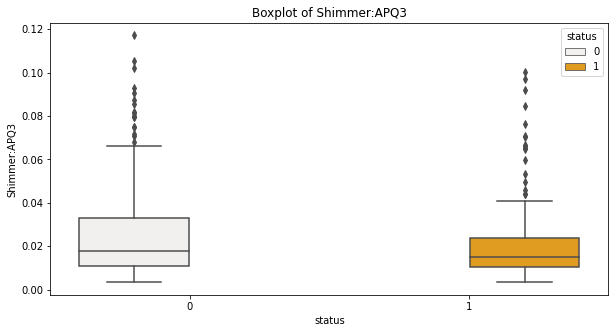

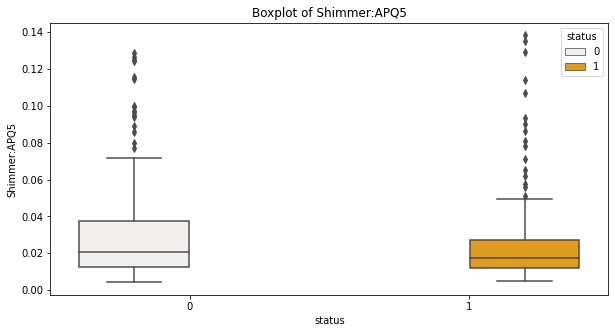

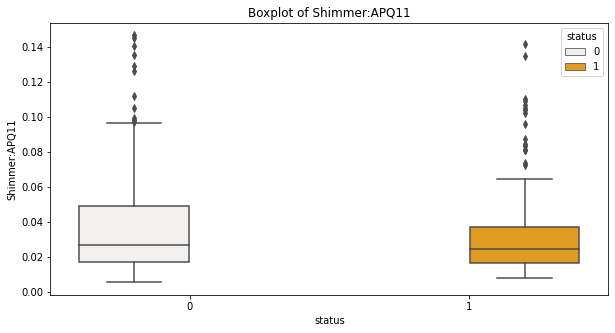

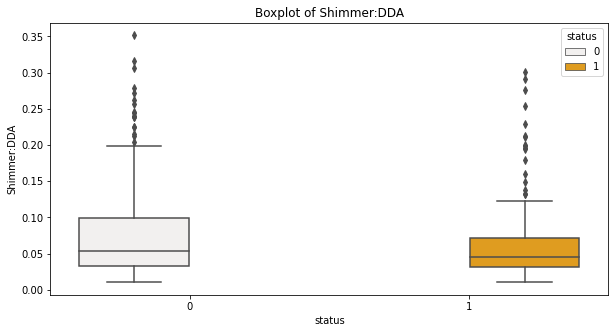

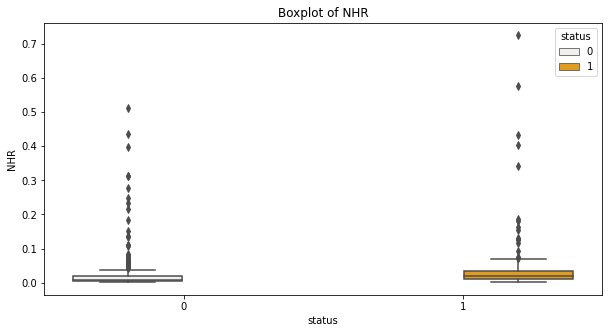

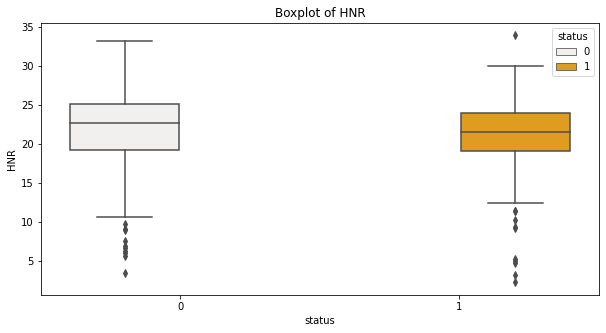

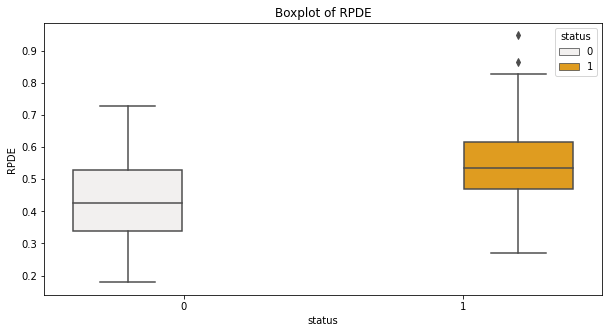

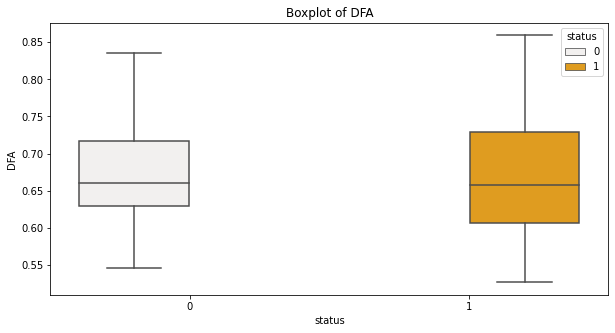

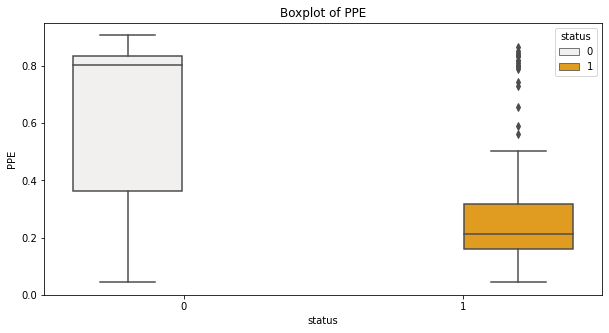

In [18]:
for col in list_of_non_object_cols:
    BoxPlot(x = 'status',\
            y = col,\
            data = data,\
            color = 'orange',\
            hue = 'status',\
            title = 'Boxplot of {}'.format(col))

Data Preprocessing

In [19]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             480 non-null    int64  
 1   test_time      480 non-null    float64
 2   motor_UPDRS    480 non-null    float64
 3   total_UPDRS    480 non-null    float64
 4   Jitter(%)      480 non-null    float64
 5   Jitter(Abs)    480 non-null    float64
 6   Jitter:RAP     480 non-null    float64
 7   Jitter:PPQ5    480 non-null    float64
 8   Jitter:DDP     480 non-null    float64
 9   Shimmer        480 non-null    float64
 10  Shimmer(dB)    480 non-null    float64
 11  Shimmer:APQ3   480 non-null    float64
 12  Shimmer:APQ5   480 non-null    float64
 13  Shimmer:APQ11  480 non-null    float64
 14  Shimmer:DDA    480 non-null    float64
 15  NHR            480 non-null    float64
 16  HNR            480 non-null    float64
 17  RPDE           480 non-null    float64
 18  DFA       

In [20]:
data.isnull().sum()

ID               0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
status           0
dtype: int64

Removing Outliers:

In [21]:
from scipy.stats import iqr
import numpy as np
import pandas as pd
from scipy import stats
iqr(data, axis=0)
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
for col in list_of_non_object_cols:
    data['z_score']=stats.zscore(data[col])
    data.loc[data['z_score'].abs()<=3]
for col in list_of_non_object_cols:
    data['ewm_alpha_1']=data[col].ewm(alpha=0.1).mean()
    data['ewm_alpha_3']=data[col].ewm(alpha=0.3).mean()
    data['ewm_alpha_6']=data[col].ewm(alpha=0.6).mean()
data

,ID,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,NHR,HNR,RPDE,DFA,PPE,status,z_score,ewm_alpha_1,ewm_alpha_3,ewm_alpha_6
0,173,5.6431,28.199,34.398,0.00074,0.000005,0.00015,0.00038,0.00045,0.04229,...,0.003743,25.448,0.264110,0.750600,0.826650,0,1.220761,0.826650,0.826650,0.826650
1,325,12.6660,28.447,34.894,0.00564,0.000030,0.00331,0.00292,0.00994,0.02751,...,0.018100,19.147,0.431674,0.683244,0.168895,0,-0.925025,0.480463,0.439735,0.356825
2,19,19.6810,28.695,35.389,0.00823,0.000067,0.00392,0.00420,0.01176,0.02592,...,0.031999,20.454,0.654040,0.715000,0.336180,1,-0.379294,0.427222,0.392450,0.343591
3,24,25.6470,28.905,35.810,0.00482,0.000055,0.00206,0.00284,0.00618,0.05712,...,0.043069,15.739,0.659260,0.727770,0.203540,1,-0.812003,0.362179,0.317870,0.257353
4,24,33.6420,29.187,36.375,0.00520,0.000054,0.00276,0.00305,0.00828,0.05281,...,0.040279,15.697,0.588390,0.753080,0.234980,1,-0.709437,0.331118,0.287979,0.243790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,308,114.7000,17.510,26.510,0.00520,0.000030,0.00287,0.00312,0.00862,0.06511,...,0.048240,13.922,0.602874,0.740837,0.220968,1,-0.755148,0.376788,0.291657,0.249267
476,210,121.8000,17.670,26.670,0.00127,0.000010,0.00029,0.00057,0.00088,0.07266,...,0.016998,18.765,0.468310,0.702750,0.836520,1,1.252960,0.422761,0.455116,0.601619
477,21,128.7600,17.826,26.826,0.01344,0.000102,0.00684,0.00603,0.02053,0.10508,...,0.061957,16.265,0.567660,0.695040,0.289730,1,-0.530827,0.409458,0.405500,0.414486
478,288,135.7300,17.983,26.983,0.00197,0.000016,0.00046,0.00101,0.00138,0.08563,...,0.023437,17.316,0.576600,0.704240,0.818080,0,1.192803,0.450320,0.529274,0.656642


Data Correlation

In [22]:
data.corr()

,ID,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,z_score,ewm_alpha_1,ewm_alpha_3,ewm_alpha_6
ID,1.000000,0.027433,0.007328,0.007857,-0.276397,-0.370162,-0.261520,-0.237475,-0.261447,0.098246,...,0.112671,-0.046222,0.005650,-0.282354,0.146883,0.329155,0.329155,0.144219,0.216550,0.289340
test_time,0.027433,1.000000,0.267425,0.325700,-0.071362,-0.051212,-0.065358,-0.079533,-0.065288,-0.042936,...,-0.037988,-0.077118,0.023030,-0.039057,0.025484,-0.048417,-0.048417,-0.056022,-0.041506,-0.041771
motor_UPDRS,0.007328,0.267425,1.000000,0.981899,-0.024248,-0.011325,-0.022821,-0.028759,-0.022795,-0.033897,...,-0.037806,-0.058519,0.059368,-0.035765,0.028826,-0.046570,-0.046570,-0.115266,-0.080060,-0.061340
total_UPDRS,0.007857,0.325700,0.981899,1.000000,-0.032767,-0.019040,-0.032204,-0.035878,-0.032169,-0.035816,...,-0.039285,-0.059173,0.053180,-0.029414,0.014214,-0.058630,-0.058630,-0.161121,-0.111500,-0.079549
Jitter(%),-0.276397,-0.071362,-0.024248,-0.032767,1.000000,0.865378,0.992733,0.977837,0.992735,0.285681,...,0.226110,0.617096,-0.421808,0.483331,0.171683,-0.188605,-0.188605,-0.148103,-0.195212,-0.203349
Jitter(Abs),-0.370162,-0.051212,-0.011325,-0.019040,0.865378,1.000000,0.847827,0.796201,0.847836,0.204168,...,0.163770,0.507449,-0.407756,0.570568,0.233943,-0.261545,-0.261545,-0.134025,-0.221403,-0.260065
Jitter:RAP,-0.261520,-0.065358,-0.022821,-0.032204,0.992733,0.847827,1.000000,0.973900,1.000000,0.256524,...,0.200856,0.594699,-0.383586,0.444109,0.159318,-0.196610,-0.196610,-0.156270,-0.203874,-0.211385
Jitter:PPQ5,-0.237475,-0.079533,-0.028759,-0.035878,0.977837,0.796201,0.973900,1.000000,0.973897,0.311381,...,0.248094,0.644720,-0.420066,0.442498,0.145281,-0.156291,-0.156291,-0.130487,-0.169000,-0.172675
Jitter:DDP,-0.261447,-0.065288,-0.022795,-0.032169,0.992735,0.847836,1.000000,0.973897,1.000000,0.256541,...,0.200865,0.594696,-0.383601,0.444072,0.159286,-0.196567,-0.196567,-0.156241,-0.203854,-0.211364
Shimmer,0.098246,-0.042936,-0.033897,-0.035816,0.285681,0.204168,0.256524,0.311381,0.256541,1.000000,...,0.985611,0.697815,-0.783031,0.352879,0.150621,0.329902,0.329902,0.108048,0.193474,0.272595


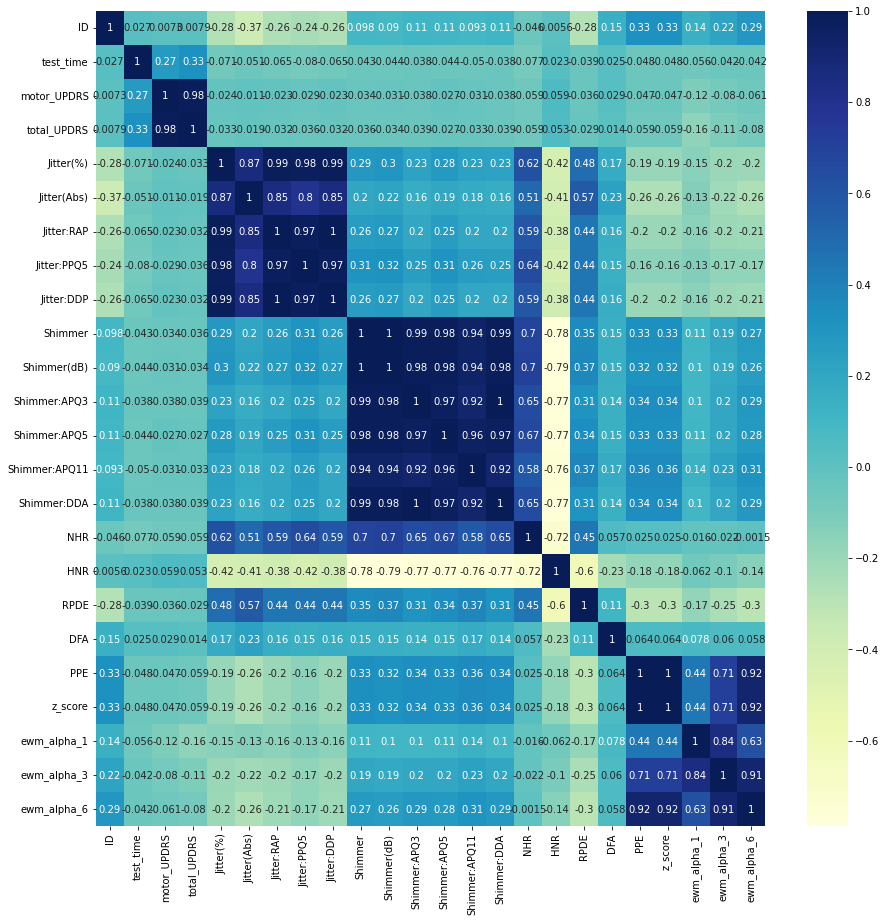

In [23]:
plt.figure(figsize=(15, 15))
p = sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')

In [24]:
data['status'].value_counts()

0    240
1    240
Name: status, dtype: int64

<AxesSubplot:ylabel='count'>

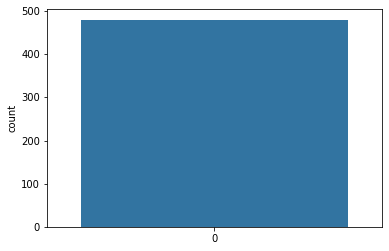

In [25]:
sns.countplot(data['status'])

In [26]:
data_fea=data.drop(['status','z_score', 'ewm_alpha_1','ewm_alpha_3','ewm_alpha_6'],axis=1)


Model evaluation

XGBoost

In [27]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#print(data_fea)


features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values
scaler=MinMaxScaler((-1,1))
#scaler.fit(data)

x=scaler.fit_transform(data_fea)
y=labels


x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=7)


XG_model =XGBClassifier(learning_rate =0.1,n_estimators=50,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,
                          scale_pos_weight=1,seed=2)
XG_model.fit(x_train, y_train, eval_metric="error",eval_set=[(x_train, y_train), (x_test, y_test)])


y_pred=XG_model.predict(x_test)
predictions = [round(value) for value in y_pred]
ACCXg=accuracy_score(y_test.astype('float64'), y_pred.astype('float64'))*100
print("ACCURACY SCORE OF XGBOOST: %.f%%"%ACCXg)
results=XG_model.evals_result()
epochs=len(results['validation_0']['error'])
print("Epochs",epochs)

[0]	validation_0-error:0.07165	validation_1-error:0.11950
[1]	validation_0-error:0.04050	validation_1-error:0.05660
[2]	validation_0-error:0.04050	validation_1-error:0.09434
[3]	validation_0-error:0.04050	validation_1-error:0.08805
[4]	validation_0-error:0.02804	validation_1-error:0.06289
[5]	validation_0-error:0.03115	validation_1-error:0.04403
[6]	validation_0-error:0.03115	validation_1-error:0.03774
[7]	validation_0-error:0.03115	validation_1-error:0.04403
[8]	validation_0-error:0.03115	validation_1-error:0.03774
[9]	validation_0-error:0.02181	validation_1-error:0.03774
[10]	validation_0-error:0.01869	validation_1-error:0.03774
[11]	validation_0-error:0.01869	validation_1-error:0.03774
[12]	validation_0-error:0.02181	validation_1-error:0.03774
[13]	validation_0-error:0.02492	validation_1-error:0.03774
[14]	validation_0-error:0.02492	validation_1-error:0.03774
[15]	validation_0-error:0.02492	validation_1-error:0.03774
[16]	validation_0-error:0.02181	validation_1-error:0.03774
[17]	va

Confusion Matrix
 [[79  0]
 [ 7 73]]


Text(33.0, 0.5, 'Actual Values ')

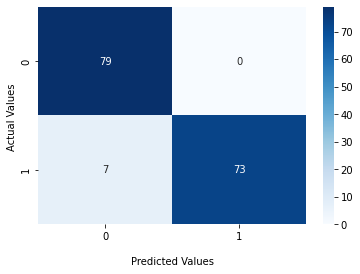

In [28]:
# Calculate the Confusion Matrix for the model.
CM1=confusion_matrix(y_test.astype(int),y_pred.astype(int))
print("Confusion Matrix\n",CM1)
ax = sns.heatmap(CM1, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

In [29]:
# Displaying the classification report using sklearn
print("Classification Report:\n",classification_report(y_test.astype(int),y_pred.astype(int)))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        79
           1       1.00      0.91      0.95        80

    accuracy                           0.96       159
   macro avg       0.96      0.96      0.96       159
weighted avg       0.96      0.96      0.96       159



Validation 

In [30]:
from scipy.sparse.construct import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import xgboost
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=None)
results = cross_val_score(model, x.astype(float), y.astype(int), cv=kfold)
print("Mean Accuracy: %.f%% \nStandard deviation percentage: %.2f%%"%(results.mean()*100, results.std()*100))

Mean Accuracy: 96% 
Standard deviation percentage: 3.15%


Random Forest

In [31]:
import numpy as np
import math
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=2):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
         
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
#         print(self.depth)
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Get the features and labels
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values

#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(features)
y=labels.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(321, 23) (159, 23) (321,) (159,)


In [33]:
model2=RandomForest(X_train,y_train,10,20,321,10,2)

In [34]:
preds=model2.predict(X_test)

In [35]:
#Checking the accuracy
ACCRF=accuracy_score(y_test.astype('int64'), preds.astype('int64'))*100
print("ACCURACY Score Of Random Forest : %.f%%"%ACCRF)

ACCURACY Score Of Random Forest : 87%


Validation

In [36]:
from scipy.sparse.construct import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=0)
kfold = StratifiedKFold(n_splits=5)
result = cross_val_score(model2, X.astype('float64'), y.astype('int64'), cv=kfold)
print("Mean Accuracy: %.f%% \nStandard deviation classification Accuracy: %.2f%%"%(result.mean()*100, result.std()*100))

Mean Accuracy: 90% 
Standard deviation classification Accuracy: 4.63%


Confusion Matrix of Random Forest
 [[79  4]
 [17 59]]


Text(33.0, 0.5, 'Actual Values ')

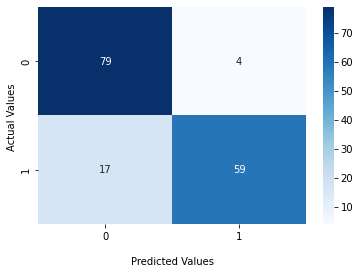

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
CM= confusion_matrix(y_test.astype('int64'),preds.astype('int64'))
print("Confusion Matrix of Random Forest\n",CM)
ax = sns.heatmap(CM, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

In [38]:
print("Classification report of Random Forest: \n",classification_report(y_test.astype('int64'),preds.astype('int64')))

Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        83
           1       0.94      0.78      0.85        76

    accuracy                           0.87       159
   macro avg       0.88      0.86      0.87       159
weighted avg       0.88      0.87      0.87       159



KNN

In [39]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
class KNN:
#Function to calculate KNN
  def predict(x_train,y , x_input, k):
    op_labels = []
     
      #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
          #Loop through each training Data
        for j in range(len(x_train)): 
              distances = eucledian(np.array(x_train[j,:]) ,item) 
              #Calculating the distance
              point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [40]:
#Importing the required modules
#Importing required modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.random import randint
#Get the features and labels
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels.astype(int)
#Split the dataset
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3,random_state=5)
model3=KNN()
#Applying our function 
y_pred = KNN.predict(X_train,y_train,X_test,10)
#Checking the accuracy
ACCKNN=accuracy_score(y_test, y_pred)*100
print("ACCURACY Score Of KNN: %.f%%"%ACCKNN)

ACCURACY Score Of KNN: 87%


Confusion Matrix of KNN
 [[63  7]
 [12 62]]


Text(33.0, 0.5, 'Actual Values ')

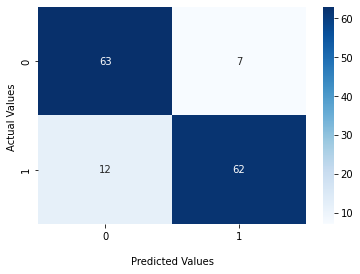

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
CM= confusion_matrix(y_test,y_pred)
print("Confusion Matrix of KNN\n",CM)
ax = sns.heatmap(CM, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

In [42]:
print("Classification report of KNN: \n",classification_report(y_test,y_pred))

Classification report of KNN: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        70
           1       0.90      0.84      0.87        74

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.87      0.87      0.87       144



In [43]:
from scipy.sparse.construct import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model3, X.astype('float64'), y.astype('int64'), cv=kfold)
print("Mean Accuracy: %.f%% \nStandard deviation classification Accuracy: %.2f%%"%(results.mean()*100, results.std()*100))

Mean Accuracy: 86% 
Standard deviation classification Accuracy: 2.38%


Accuracy Plot

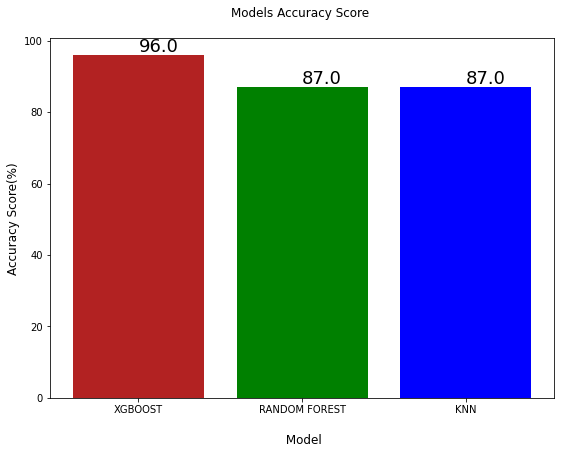

In [57]:
import matplotlib.pyplot as plt
def AccPlot():
    fig=plt.figure(figsize=(7,5))
    ax=fig.add_axes([0,0,1,1])
    models= ['XGBOOST','RANDOM FOREST','KNN']
    acc=float(format(ACCXg, '.0f'))
    acc1=float(format(ACCRF,".0f"))
    acc2=float(format(ACCKNN,".0f"))
    scores=[acc,acc1,acc2]
    ax.set_ylabel('Accuracy Score(%)',fontsize=12)
    ax.set_xlabel('\n Model',fontsize=12)
    ax.set_title("Models Accuracy Score \n")
    for i,v in enumerate(scores):
        ax.text(i,v+1,str(v),color='black',fontsize=18)
    plt.savefig('barplot_1.png',dpi=100,format='png',bbox_inches='tight')
    plt.bar(models,scores, color=['firebrick', 'green', 'blue'])
    plt.show()
AccPlot()

In [45]:
data_in=data.drop(['z_score', 'ewm_alpha_1','ewm_alpha_3','ewm_alpha_6'], axis =1)

In [46]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))
in_data=in_data.reshape(1,-1)
in_data_sca = scaler.fit_transform(in_data)

#print the predicted output for input array
output=XG_model.predict(in_data)
if output==1:
    print("Does  Has Parkinson's Disease")
else:
    print("Does not Has Parkinson's Disease")

#print("Parkinson's Disease Detected" if XG_model.predict(in_data) else "No Parkinson's Disease Detected")

ValueError: Feature shape mismatch, expected: 20, got 1

In [ ]:
#325,12.666,28.447,34.894,0.00564,0.00003,0.00331,0.0292,0.00994,0.02751,0.263,0.01604,0.01657,0.1879,0.04812,0.0181,19.147,0.431674,0.683244,0.168895
#Parkinson Disease Detected
#9,117.66,33.178,42.904,0.01713,0.000169,0.01021,0.00865,0.03064,0.04686,0.446,0.2312,0.02679,0.3946,0.06935,0.05563,17.387,0.75697,0.77215,0.45606
#No Parkinson Disease Detected
#Parkinson Disease is Detected
#325,152.64,35.509,46.013,0.0136,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,0.131728

# No parkinson
#297,117.67,33.178,42.904,0.00742,0.00005,0.00364,0.00432,0.01092,0.05517,0.542,0.2471,0.03572,0.05767,0.07413,0.0316,17.28,0.665318,0.719467,0.377429

In [62]:
import tkinter
from tkinter import ttk
from tkinter import *
from PIL import ImageTk, Image
import pandas as pd
import tkinter  as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile

def DATASET():

    my_w = tkinter.Tk()
    my_w.geometry("800x800")  # Size of the window
    my_w.title('Dataset')

    my_font1=('times', 12, 'bold')
    l1 = tk.Label(my_w,text='Read File & create DataFrame',
        width=30,font=my_font1)
    l1.grid(row=1,column=1)
    b1 = tk.Button(my_w, text='Browse File',
       width=20,command = lambda:upload_file())
    b1.grid(row=2,column=1)
    t1=tk.Text(my_w,width=200,height=200)
    t1.grid(row=3,column=1,padx=5)

    def upload_file():
        f_types = [('CSV files',"*.csv"),('All',"*.*")]
        file = filedialog.askopenfilename(filetypes=f_types)
        #l1.config(text=file) # display the path
        df=pd.read_csv(file) # create DataFrame
        #str1="Rows:" + str(df.shape[0])+ "\nColumns:"+str(df.shape[1])
        #print(str1)
        t1.insert(tk.END, df) # add to Text widget
    my_w.mainloop()  # Keep the window open



def Accuracy():
    Accuracy = tkinter.Tk()
    Accuracy.title("accuracy")
    Accuracy.geometry('600x300')
    frame1 = tkinter.LabelFrame(Accuracy, text=" \t   Accuracy \t\t",bg='black', fg='White',font=("Calibri", 32, 'bold'))
    frame1.place(height=300, width=600)
    style=ttk.Style(frame1)
    style.theme_use('clam')
    treev = ttk.Treeview(frame1,selectmode ='browse')
    treev.pack(fill=tkinter.BOTH,expand=True)
    treev["columns"] = ("1", "2")
    treev['show'] = 'headings'
    treev.column("1", width = 150, anchor ='c')
    treev.column("2", width = 50, anchor ='c')
    #treev.column("3", width = 90, anchor ='se')
    style=ttk.Style()
    style.configure("Treeview.Heading",font=("Times New Roman", 14,'bold'))
    treev.heading("1", text ="Algorithms")
    treev.heading("2", text ="Accuracy")
    #treev.heading("3", text ="Time")

    acc1=format(ACCXg,".0f")
    #timer=format(s11,".3f")
    treev.insert("", 'end', text ="L1",values =("XG BOOST",acc1))

    acc2=format(ACCRF,".0f")
    #format(RF_model.accuracy_score(X_test.astype('float64'),y_test.astype('float64'))*100,".1f")
    #timer2=format(s22,".3f")
    treev.insert("", 'end', text ="L2",values =("Random Forest",acc2))

    acc3=format(ACCKNN,".0f")
    #timer4=format(s44,".3f")
    treev.insert("", 'end', text ="L3",values =("KNN",acc3))

    Accuracy.mainloop()

from tkinter import *
from tkinter import messagebox
def validation2(inp):

    r=1
    if (inp <3.866) or (inp >178.8):
        if(inp <0.0000001) or (inp >50.00):
             r=0
    return r
import tkinter as tk
def Prediction():
    top = tkinter.Tk()
    top.title("Prediction")
    top.geometry('1000x1000')
    top['background']='gray'
    head = tkinter.Label(top, text = "   \t  Parkinson Disease Prediction                        \t    ",
                 bg='black', fg='White',font=("Serif", 32, 'bold')).place(x =100,y =2 )
    tkinter.Label(top,text="MDVP:FO",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=150)
    k1=tk.StringVar()
    k1_entrybox=ttk.Entry(top,width=16,textvariable=k1)
    k1_entrybox.place(x=300,y=150)

    tkinter.Label(top,text="MDVP:FHO",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=200)
    k2=tk.StringVar()
    k2_entrybox=ttk.Entry(top,width=16,textvariable=k2)
    k2_entrybox.place(x=300,y=200)

    tkinter.Label(top,text="motor_UPDRS",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=250)
    k3=tk.StringVar()
    k3_entrybox=ttk.Entry(top,width=16,textvariable=k3)
    k3_entrybox.place(x=300,y=250)

    tkinter.Label(top,text="total_UPDRS",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=300)
    k4=tk.StringVar()
    k4_entrybox=ttk.Entry(top,width=16,textvariable=k4)
    k4_entrybox.place(x=300,y=300)

    tkinter.Label(top,text="jitter%",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=350)
    k5=tk.StringVar()
    k5_entrybox=ttk.Entry(top,width=16,textvariable=k5)
    k5_entrybox.place(x=300,y=350)

    tkinter.Label(top,text="jitterAbs",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=400)
    k6=tk.StringVar()
    k6_entrybox=ttk.Entry(top,width=16,textvariable=k6)
    k6_entrybox.place(x=300,y=400)

    tkinter.Label(top,text="jitter:RAP",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=450)
    k7=tk.StringVar()
    k7_entrybox=ttk.Entry(top,width=16,textvariable=k7)
    k7_entrybox.place(x=300,y=450)

    tkinter.Label(top,text="jitter:PPQ5",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=500)
    k8=tk.StringVar()
    k8_entrybox=ttk.Entry(top,width=16,textvariable=k8)
    k8_entrybox.place(x=300,y=500)

    tkinter.Label(top,text="jitter:DDP",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=550)
    k9=tk.StringVar()
    k9_entrybox=ttk.Entry(top,width=16,textvariable=k9)
    k9_entrybox.place(x=300,y=550)

    tkinter.Label(top,text="Shimmer",bg='gray',font=("Serif", 14, 'bold')).place(x=30,y=600)
    k10=tk.StringVar()
    k10_entrybox=ttk.Entry(top,width=16,textvariable=k10)
    k10_entrybox.place(x=300,y=600)

    tkinter.Label(top,text="Shimmer dB",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=150)
    k11=tk.DoubleVar()
    k11_entrybox=ttk.Entry(top,width=16,textvariable=k11)
    k11_entrybox.place(x=860,y=150)

    tkinter.Label(top,text="Shimmer:APQ3",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=200)
    k12=tk.StringVar()
    k12_entrybox=ttk.Entry(top,width=16,textvariable=k12)
    k12_entrybox.place(x=860,y=200)

    tkinter.Label(top,text="Shimmer:APQ5",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=250)
    k13=tk.StringVar()
    k13_entrybox=ttk.Entry(top,width=16,textvariable=k13)
    k13_entrybox.place(x=860,y=250)

    tkinter.Label(top,text="Shimmer:APQ11",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=300)
    k14=tk.StringVar()
    k14_entrybox=ttk.Entry(top,width=16,textvariable=k14)
    k14_entrybox.place(x=860,y=300)

    tkinter.Label(top,text="Shimmer:DDA",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=350)
    k15=tk.StringVar()
    k15_entrybox=ttk.Entry(top,width=16,textvariable=k15)
    k15_entrybox.place(x=860,y=350)

    tkinter.Label(top,text="NHR",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=400)
    k16=tk.StringVar()
    k16_entrybox=ttk.Entry(top,width=16,textvariable=k16)
    k16_entrybox.place(x=860,y=400)

    tkinter.Label(top,text="HNR",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=450)
    k17=tk.DoubleVar()
    k17_entrybox=ttk.Entry(top,width=16,textvariable=k17)
    k17_entrybox.place(x=860,y=450)

    tkinter.Label(top,text="RPDE",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=500)
    k18=tk.StringVar()
    k18_entrybox=ttk.Entry(top,width=16,textvariable=k18)
    k18_entrybox.place(x=860,y=500)

    tkinter.Label(top,text="DFA",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=550)
    k19=tk.StringVar()
    k19_entrybox=ttk.Entry(top,width=16,textvariable=k19)
    k19_entrybox.place(x=860,y=550)

    tkinter.Label(top,text="PPE",bg='gray',font=("Serif", 14, 'bold')).place(x=590,y=600)
    k20=tk.StringVar()
    k20_entrybox=ttk.Entry(top,width=16,textvariable=k20)
    k20_entrybox.place(x=860,y=600)


    def Submit():
        v=[]
        d1=int(k1_entrybox.get())
        #v1=validation1(d1)
        d2=float(k2_entrybox.get())
        v2=validation2(d2)
        v.append(v2)
        d3=float(k3_entrybox.get())
        v3=validation2(d3)
        v.append(v3)
        d4=float(k4_entrybox.get())
        v4=validation2(d4)
        v.append(v4)
        d5=float(k5_entrybox.get())
        v5=validation2(d5)
        v.append(v5)
        d6=float(k6_entrybox.get())
        v6=validation2(d6)
        v.append(v6)
        d7=float(k7_entrybox.get())
        v7=validation2(d7)
        v.append(v7)
        d8=float(k8_entrybox.get())
        v8=validation2(d8)
        v.append(v8)
        d9=float(k9_entrybox.get())
        v9=validation2(d9)
        v.append(v9)
        d10=float(k10_entrybox.get())
        v10=validation2(d10)
        v.append(v10)
        d11=float(k11_entrybox.get())
        v11=validation2(d11)
        v.append(v11)
        d12=float(k12_entrybox.get())
        v12=validation2(d12)
        v.append(v12)
        d13=float(k13_entrybox.get())
        v13=validation2(d13)
        v.append(v13)
        d14=float(k14_entrybox.get())
        v14=validation2(d14)
        v.append(v14)
        d15=float(k15_entrybox.get())
        v15=validation2(d15)
        v.append(v15)
        d16=float(k16_entrybox.get())
        v16=validation2(d16)
        v.append(v16)
        d17=float(k17_entrybox.get())
        v17=validation2(d17)
        v.append(v17)
        d18=float(k18_entrybox.get())
        v18=validation2(d18)
        v.append(v18)
        d19=float(k19_entrybox.get())
        v19=validation2(d19)
        v.append(v19)
        d20=float(k20_entrybox.get())
        v20=validation2(d20)
        v.append(v20)

        #for i in v:
            #print(i)

        newWindow3 = tkinter.Toplevel(top)
        newWindow3.title("Patient Result")
        newWindow3['background']='white'
        newWindow3.geometry("800x450")
        label=tkinter.Label(newWindow3,
              text ='             Patient Result  \t  \t', bg='black', fg="white", font=("Serif", 32, 'bold')).place(x = 0,y = 10)

        d={'MDVP:FO' :[d1] ,'MDVP:FHO' :[d2],' motor_UPDRS':[d3],'total_UPDRS':[d4],'Jitter':[d5],'Jitter(Abs)':[d6],'Jitter:RAP':[d7],'Jitter:PPQ5':[d8],
                'Jitter:DDP':[d9],'Shimmer':[d10],'Shimmer(dB)':[d11],'Shimmer:APQ3':[d12],'Shimmer:APQ5':[d13],'Shimmer:APQ11':[d14],
                'Shimmer:DDA':[d15],'NHR':[d16],'HNR':[d17],'RPDE':[d18],'DFA':[d19],'PPE':[d20]}
        #print(type(d1))
        #print(type(d3))
        df3=pd.DataFrame(d)
        #print(df3)
        pred = XG_model.predict(df3)

        r=0
        for i in v:
            if i==0:
                r+=1

        if r!=0:
            result="Invalid Input"
        elif pred==1:
            result="Does Have Parkinson Disease"
        else:
            result="Does not has Parkinson Disease"


        tkinter.Label(newWindow3,text =result,bg='white',font=("Serif", 26,'bold')).place(x = 2,y = 100)
    sub=ttk.Button(top,text="Submit",command=Submit).place(x=450,y=650)
    Prediction.mainloop()


global img
from tkinter import *
from PIL import ImageTk,Image
def ACCURACYPLOT():
    root =tkinter.Toplevel()
    root.geometry("811x575")
    img1=PhotoImage(file='plot.png')
    Label(root,image=img1).pack()

    root.mainloop()
top = tkinter.Toplevel()
top.title("Parkinson's Disease Prediction")
label=tkinter.Label(top, text ="            Parkinson's Disease Prediction  \t  \t", bg='black', fg="white", font=("Serif", 32, 'bold')).place(x = 0,y = 10)
top.geometry('1000x1000')
img = ImageTk.PhotoImage(file="bg.jpg")
label1 = tkinter.Label(
    top,
    image=img
)
label1.place(x=0, y=0)
btn0 = tkinter.Button(top, text="DATASET", command=DATASET,bg="white", font=("Serif", 11)).place(x=50, y=300)
btn1 = tkinter.Button(top, text="ACCURACY PLOT",command=ACCURACYPLOT,bg="white", font=("Serif", 11)).place(x=200, y=300)
btn2 = tkinter.Button(top, text="ACCURACY",command=Accuracy,bg="white", font=("Serif", 11)).place(x=400, y=300)
btn3 = tkinter.Button(top, text="PREDICTION",command=Prediction, bg="white", font=("Serif", 11)).place(x=600, y=300)
top.mainloop()            


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Tarun\AppData\Local\Programs\Python\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\Tarun\AppData\Local\Temp\ipykernel_32940\4059518973.py", line 288, in Prediction
    Prediction.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'
